In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [2]:
df_insurance=pd.read_csv('SBI_Life_insurance.csv')  
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df_insurance.shape

(1338, 8)

In [4]:
df_insurance.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
df_insurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
df_insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
df_insurance.insuranceclaim.unique()

array([1, 0], dtype=int64)

In [9]:
df_insurance.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

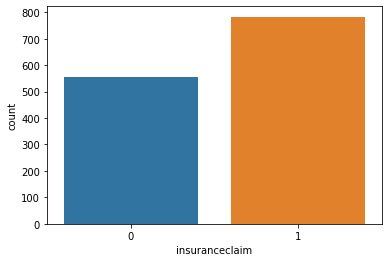

In [11]:
sns.countplot(df_insurance['insuranceclaim'])                #Count of both claim or not
plt.show()

In [12]:
df_insurance_cor=df_insurance.corr()                          #To check the correlation
df_insurance_cor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


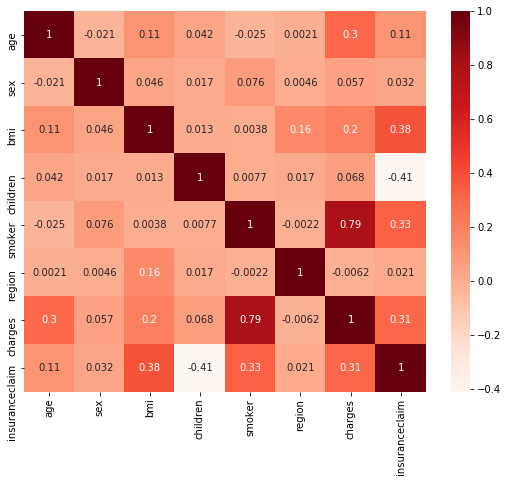

In [13]:
plt.figure(figsize=(9,7))
sns.heatmap(df_insurance_cor,cmap='Reds',annot=True)

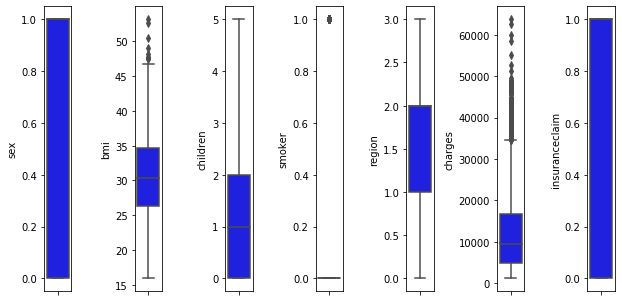

In [14]:
col_list=df_insurance.columns.values
plt.figure(figsize=(12,50))                                    #Box plot to find out outliers
for i in range(1, len(col_list)):
    plt.subplot(12,10,i+1)
    sns.boxplot(df_insurance[col_list[i]],color='blue',orient='v')
    plt.tight_layout()

In [22]:
z_score=abs(zscore(df_insurance))
print(df_insurance.shape)
df_insurance_final=df_insurance.loc[(z_score<3).all(axis=1)]                  
print(df_insurance_final.shape)
#to quantify the outliers

(1338, 8)
(1309, 8)


In [23]:
df_insurance=df_insurance[(z_score<3).all(axis=1)]  
#to remove the outliers

In [24]:
df_insurance.shape

(1309, 8)

In [26]:
x = df_insurance.iloc[:,:7]
y = df_insurance['insuranceclaim']
#Spliting the data


In [27]:
x.shape

(1309, 7)

In [28]:
y.shape

(1309,)

In [29]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [31]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)

#The below output shows that we are not getting acceptable level of r2 score in most of the cases. It is a Classification problem

r2 score corresponding to random state:  42  is:  0.4401858979642661
r2 score corresponding to random state:  43  is:  0.4346514027955397
r2 score corresponding to random state:  44  is:  0.45225841180526083
r2 score corresponding to random state:  45  is:  0.4621912270780155
r2 score corresponding to random state:  46  is:  0.4551400535588074
r2 score corresponding to random state:  47  is:  0.4359158942091279
r2 score corresponding to random state:  48  is:  0.4385078881476936
r2 score corresponding to random state:  49  is:  0.47789835700337957
r2 score corresponding to random state:  50  is:  0.47204969051091816
r2 score corresponding to random state:  51  is:  0.4557105320970022
r2 score corresponding to random state:  52  is:  0.37355546052125377
r2 score corresponding to random state:  53  is:  0.47847695130774426
r2 score corresponding to random state:  54  is:  0.48133146409042815
r2 score corresponding to random state:  55  is:  0.5204092051870749
r2 score corresponding to ra

In [32]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
#Testing the models along with their accuracy score

0.9847328244274809
0.8816793893129771
0.8625954198473282
0.6603053435114504


In [33]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
#Testing the models along with their confusion matrix and classification report

[[104   2]
 [  2 154]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.99      0.99      0.99       156

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

[[ 97   9]
 [ 22 134]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       106
           1       0.94      0.86      0.90       156

    accuracy                           0.88       262
   macro avg       0.88      0.89      0.88       262
weighted avg       0.89      0.88      0.88       262

[[ 89  17]
 [ 19 137]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.89      0.88      0.88       156

    accuracy                           0.86       262
   macro avg       0.86      0.86      0.86       262
weigh

In [34]:
#DecisionTreeClassifier have highest accuracy score, 
#now we are checking that where model will give best accuracy score at optimum random_state
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.19)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    print("accuracy score corresponding to random state: ",r_state," is: ",accuracy_score)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state
print()
print()
print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)

accuracy score corresponding to random state:  42  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  43  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  44  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  45  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  46  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  47  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  48  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  49  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  50  is:  <function accuracy_score at 0x0000003B79045708>
accuracy score corresponding to random state:  51  is:  <functio

In [36]:
#since maximum accuracy score is coming around random state 80 and using DecsionTreeClassifier model, we will use that to create our model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.21)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[114   0]
 [  0 161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       161

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [37]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [38]:
df_insurance_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_insurance_pred.to_csv("Project2_Prediction.csv")